In [ ]:
# 
# Notebook illustrating a few astropy ( https://www.astropy.org ) examples.
# Although astropy was designed for the astronomical community many of its
# builtin functions are general and can be used for a wide array of 
# image and time series processing for all sorts of data.
#

In [5]:
#
# Functions like Gauss2d (see below) provide simple ways to generate 
# Gaussian distributions with various parameters. 
#
import numpy as np
from astropy.modeling.models import Gaussian2D
y, x = np.mgrid[0:500, 0:600]
data = (Gaussian2D(1, 150, 100, 20, 10, theta=0.5)(x, y) +
        Gaussian2D(0.5, 400, 300, 8, 12, theta=1.2)(x,y) +
        Gaussian2D(0.75, 250, 400, 5, 7, theta=0.23)(x,y) +
        Gaussian2D(0.9, 525, 150, 3, 3)(x,y) +
        Gaussian2D(0.6, 200, 225, 3, 3)(x,y))
data += .01 * np.random.randn(500, 600)
#
# This is an example of some "noise"!
#
cosmic_ray_value = 0.997
data[100, 300:310] = cosmic_ray_value

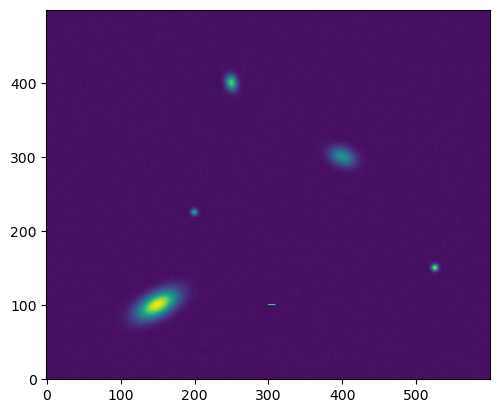

In [6]:
import matplotlib.pyplot as plt
plt.imshow(data, origin='lower');

In [ ]:
from astropy.nddata import CCDData
ccd = CCDData(data, 
              meta={'object': 'fake galaxy', 'filter': 'R'},
              unit='adu')

from astropy.nddata import Cutout2D
position = (149.7, 100.1)
size = (81, 101)     # pixels
cutout = Cutout2D(ccd, position, size)
plt.imshow(cutout.data, origin='lower') 

In [ ]:
plt.imshow(ccd, origin='lower')  
cutout.plot_on_original(color='white') 

In [ ]:
from photutils.segmentation import detect_threshold

In [ ]:
threshold = detect_threshold(ccd.data, nsigma=2.)

In [ ]:
from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from photutils.segmentation import detect_sources
sigma = 3.0 * gaussian_fwhm_to_sigma  # FWHM = 3.
kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
segm = detect_sources(ccd.data, threshold, npixels=5, kernel=kernel)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12.5))
ax1.imshow(ccd.data, origin='lower', cmap='Greys_r', norm=norm)
ax1.set_title('Data')
cmap = segm.make_cmap(seed=123)
ax2.imshow(segm, origin='lower', cmap=cmap, interpolation='nearest')
ax2.set_title('Segmentation Image')

In [ ]:
#
# Scipy Curve fit equaivalent
#
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting


mu, sigma, amplitude = 0.0, 10.0, 10.0
N2 = 100
x2 = np.linspace(-30, 30, N2)
y2 = amplitude * np.exp(-(x2-mu)**2 / (2*sigma**2))
y2 = np.array([y_point + np.random.normal(0, 1) for y_point in y2])   #Another way to add random gaussian noise
sigma = 1
y2_err = np.ones(N2)*sigma
plt.errorbar(x2, y2, yerr=y2_err, fmt='k.')
plt.xlabel('$x_2$')
plt.ylabel('$y_2$')

In [ ]:
model_gauss = models.Gaussian1D()
fitter_gauss = fitting.LevMarLSQFitter()
best_fit_gauss = fitter_gauss(model_gauss, x2, y2, weights=1/y2_err**2)

In [ ]:
plt.errorbar(x2, y2, yerr=y2_err, fmt='k.')
plt.plot(x2, best_fit_gauss(x2), 'g-', linewidth=6, label='astropy.modeling')
plt.xlabel('$x_2$')
plt.ylabel('$y_2$')
plt.legend()

In [ ]:
#
import astropy
?astropy.modeling.models.Legendre1D

In [ ]:
import matplotlib.pyplot as plt
M1=astropy.modeling.models.Legendre1D(1,c1=1)
M2=astropy.modeling.models.Legendre1D(2,c2=1)
M3=astropy.modeling.models.Legendre1D(3,c3=1)
M4=astropy.modeling.models.Legendre1D(4,c4=1)
M5=astropy.modeling.models.Legendre1D(5,c5=1)
M6=astropy.modeling.models.Legendre1D(6,c6=1)
M7=astropy.modeling.models.Legendre1D(7,c7=1)

In [ ]:
x=np.linspace(-1,1,200);
plt.plot(x, M1(x) )
plt.plot(x, M2(x) )
plt.plot(x, M3(x) )
plt.plot(x, M4(x) )
plt.plot(x, M5(x) )
plt.plot(x, M6(x) )
plt.plot(x, M7(x) );